#Importing Required Modules


In [ ]:
import numpy as np
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
import datetime
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from sklearn.model_selection import train_test_split


#Importing MNIST Dataset

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


#Visualizing Random Images from Dataset

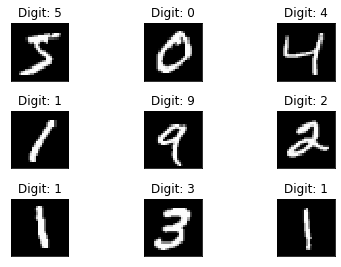

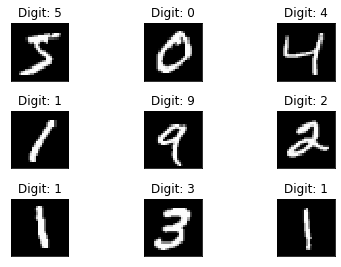

In [ ]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

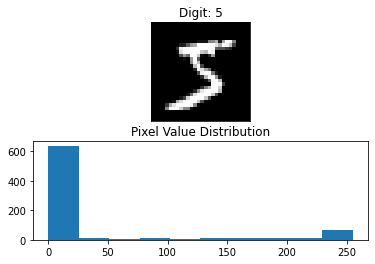

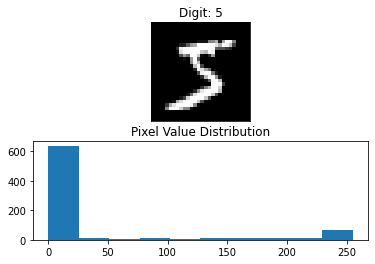

In [ ]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(X_train[0], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train[0].reshape(784))
plt.title("Pixel Value Distribution")
fig

#Data Preprocessing

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.16666, random_state=42)
# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)
X_val = X_val.reshape(X_val.shape[0], 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')
# normalizing the data to help with the training
X_train /= 255
X_test /= 255
X_val /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

X_train shape (50000, 28, 28)
y_train shape (50000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Train matrix shape (50000, 784)
Test matrix shape (10000, 784)


In [ ]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
Y_val = np_utils.to_categorical(y_val, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (50000,)
Shape after one-hot encoding:  (50000, 10)


#Building Model for Part a

In [ ]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(500, input_shape=(784,)))
model.add(Activation('relu'))                            
# model.add(Dropout(0.2))

model.add(Dense(500))
model.add(Activation('relu'))
# model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))


In [ ]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer='adam')


#Training Model for 250 epoch and plotting accuracy and loss

Epoch 1/250
391/391 - 1s - loss: 0.2391 - acc: 0.9292 - val_loss: 0.1190 - val_acc: 0.9639
Epoch 2/250
391/391 - 1s - loss: 0.0879 - acc: 0.9729 - val_loss: 0.0976 - val_acc: 0.9691
Epoch 3/250
391/391 - 1s - loss: 0.0539 - acc: 0.9828 - val_loss: 0.0808 - val_acc: 0.9761
Epoch 4/250
391/391 - 1s - loss: 0.0379 - acc: 0.9878 - val_loss: 0.0754 - val_acc: 0.9753
Epoch 5/250
391/391 - 1s - loss: 0.0286 - acc: 0.9911 - val_loss: 0.0694 - val_acc: 0.9807
Epoch 6/250
391/391 - 1s - loss: 0.0232 - acc: 0.9922 - val_loss: 0.0678 - val_acc: 0.9797
Epoch 7/250
391/391 - 1s - loss: 0.0201 - acc: 0.9931 - val_loss: 0.0882 - val_acc: 0.9774
Epoch 8/250
391/391 - 1s - loss: 0.0168 - acc: 0.9945 - val_loss: 0.0774 - val_acc: 0.9812
Epoch 9/250
391/391 - 1s - loss: 0.0149 - acc: 0.9950 - val_loss: 0.0975 - val_acc: 0.9779
Epoch 10/250
391/391 - 1s - loss: 0.0129 - acc: 0.9955 - val_loss: 0.1045 - val_acc: 0.9778
Epoch 11/250
391/391 - 1s - loss: 0.0155 - acc: 0.9944 - val_loss: 0.0738 - val_acc: 0.98

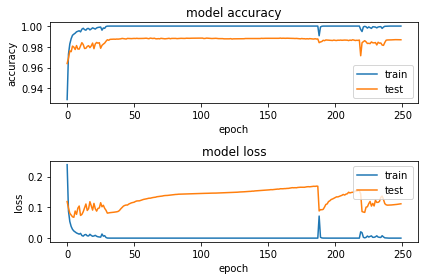

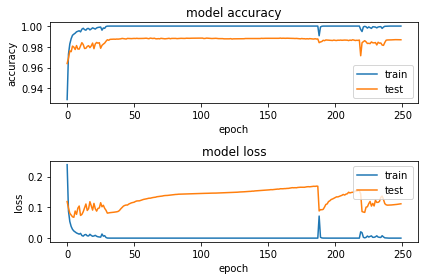

In [ ]:
# training the model and saving metrics in history
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=250,
          verbose=2,
          validation_data=(X_val, Y_val))


# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')

plt.tight_layout()

fig

#Evaluating model on test Set

In [ ]:
model.evaluate(X_train, Y_train)  

1563/1563 [==============================] - 3s 2ms/step - loss: 1.1550e-06 - acc: 1.0000


[1.1549692544576828e-06, 1.0]

#Part b: Implementing regularization

In [ ]:
from tensorflow.keras import regularizers
def build_model(i):
  # building a linear stack of layers with the sequential model
  model = Sequential()
  model.add(Dense(500, input_shape=(784,), kernel_regularizer=regularizers.l2(i)))
  model.add(Activation('relu'))                            
  model.add(Dense(500, kernel_regularizer=regularizers.l2(i)))
  model.add(Activation('relu'))
  model.add(Dense(10))
  model.add(Activation('softmax'))
  return model

##Varing Regularization Parameter and calculating accuracy for each value

In [ ]:
reg_param = [0.0001, 0.001, 0.01, 0.1]
reg_acc= []
reg_loss =[]
for param in reg_param:
    
    model = build_model(param)
    model.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer='adam')
    history = model.fit(X_train, Y_train,
          batch_size=128, epochs=250,
          verbose=2,
          validation_data=(X_val, Y_val))
    
    reg_acc.append(model.evaluate(X_test, Y_test)[1])
    reg_loss.append(model.evaluate(X_test, Y_test)[0])


Epoch 1/250
391/391 - 2s - loss: 0.3343 - acc: 0.9268 - val_loss: 0.1917 - val_acc: 0.9679
Epoch 2/250
391/391 - 1s - loss: 0.1724 - acc: 0.9723 - val_loss: 0.1648 - val_acc: 0.9731
Epoch 3/250
391/391 - 1s - loss: 0.1370 - acc: 0.9807 - val_loss: 0.1520 - val_acc: 0.9748
Epoch 4/250
391/391 - 1s - loss: 0.1170 - acc: 0.9849 - val_loss: 0.1553 - val_acc: 0.9728
Epoch 5/250
391/391 - 1s - loss: 0.1040 - acc: 0.9873 - val_loss: 0.1310 - val_acc: 0.9782
Epoch 6/250
391/391 - 1s - loss: 0.0959 - acc: 0.9882 - val_loss: 0.1299 - val_acc: 0.9807
Epoch 7/250
391/391 - 1s - loss: 0.0879 - acc: 0.9900 - val_loss: 0.1374 - val_acc: 0.9757
Epoch 8/250
391/391 - 1s - loss: 0.0822 - acc: 0.9911 - val_loss: 0.1288 - val_acc: 0.9786
Epoch 9/250
391/391 - 1s - loss: 0.0776 - acc: 0.9917 - val_loss: 0.1274 - val_acc: 0.9774
Epoch 10/250
391/391 - 1s - loss: 0.0760 - acc: 0.9915 - val_loss: 0.1293 - val_acc: 0.9781
Epoch 11/250
391/391 - 1s - loss: 0.0723 - acc: 0.9923 - val_loss: 0.1323 - val_acc: 0.97

KeyboardInterrupt: ignored

Text(0.5, 0, 'regularisation parameter')

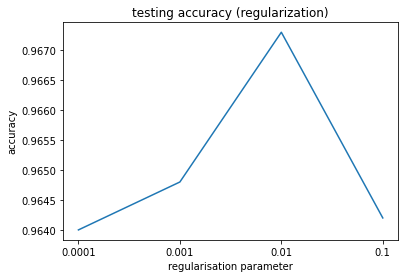

In [ ]:
plt.plot(['0.0001', '0.001', '0.01', '0.1'],reg_acc)
plt.title('testing accuracy (regularization)')
plt.ylabel('accuracy')
plt.xlabel('regularisation parameter')



[0.11337768286466599, 0.11023857444524765, 0.10372918844223022, 0.1120695173740387]


Text(0.5, 0, 'regularisation parameter')

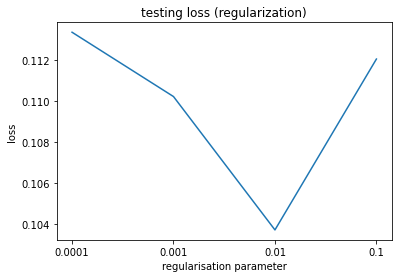

In [ ]:
print(reg_loss)
plt.plot(['0.0001', '0.001', '0.01', '0.1'],reg_loss)
plt.title('testing loss (regularization)')
plt.ylabel('loss')
plt.xlabel('regularisation parameter')

Text(0.5, 0, 'patience parameter')

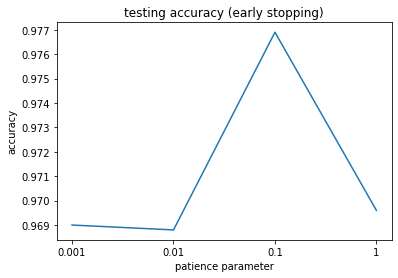

In [ ]:
# print(dropout_loss)
plt.plot(['0.001', '0.01', '0.1', '1'],[
 0.968999981880188,
 0.9688000082969666,
 0.9768999814987183,
 0.9696000218391418])
plt.title('testing accuracy (early stopping)')
plt.ylabel('accuracy')
plt.xlabel('patience parameter')

Text(0.5, 0, 'regularisation method')

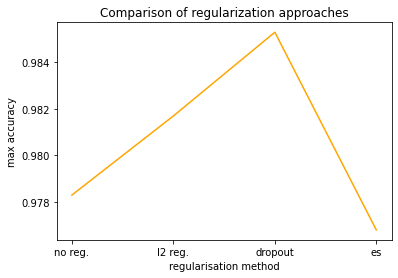

In [ ]:
# print(dropout_loss)
plt.plot(['no reg.','l2 reg.', 'dropout', 'es'],[0.9783,0.9817,0.9853, 0.9768], color = 'orange')
plt.title('Comparison of regularization approaches')
plt.ylabel('max accuracy')
plt.xlabel('regularisation method')

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
(50000, 10)
(10000, 10)
Epoch 1/250
391/391 - 1s - loss: 0.2709 - acc: 0.9192 - val_loss: 0.1271 - val_acc: 0.9601
Epoch 2/250
391/391 - 1s - loss: 0.1084 - acc: 0.9662 - val_loss: 0.0850 - val_acc: 0.9731
Epoch 3/250
391/391 - 1s - loss: 0.0771 - acc: 0.9759 - val_loss: 0.0741 - val_acc: 0.9770
Epoch 4/250
391/391 - 1s - loss: 0.0583 - acc: 0.9810 - val_loss: 0.0759 - val_acc: 0.9776
Epoch 00004: early stopping


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


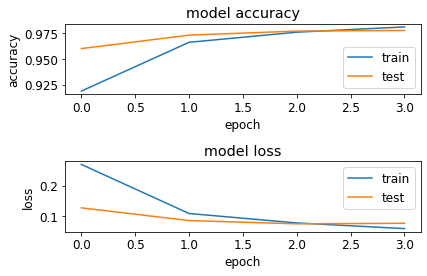

In [ ]:
# training the model and saving metrics in history
%load_ext tensorboard
print(Y_train.shape)
print(Y_val.shape)
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=250,
          verbose=2,
          validation_data=(X_val, Y_val), callbacks=[tensorboard_callback, es])


plt.rcParams.update({'font.size': 12})
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

#Part b : Implementing Early Stopping



In [ ]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(500, input_shape=(784,), kernel_regularizer='l2'))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(500, kernel_regularizer='l2'))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))


In [ ]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['acc',tf.keras.metrics.Precision()], optimizer='sgd')

Training model with early stopping

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
(50000, 10)
(10000, 10)
Epoch 1/250
1563/1563 - 6s - loss: 9.0883 - acc: 0.8081 - precision: 0.9359 - val_loss: 6.4651 - val_acc: 0.9002 - val_precision: 0.9469
Epoch 2/250
1563/1563 - 5s - loss: 4.9721 - acc: 0.8948 - precision: 0.9375 - val_loss: 3.6810 - val_acc: 0.9145 - val_precision: 0.9510
Epoch 3/250
1563/1563 - 5s - loss: 2.8951 - acc: 0.9068 - precision: 0.9449 - val_loss: 2.1920 - val_acc: 0.9196 - val_precision: 0.9541
Epoch 4/250
1563/1563 - 5s - loss: 1.7802 - acc: 0.9161 - precision: 0.9495 - val_loss: 1.3922 - val_acc: 0.9265 - val_precision: 0.9572
Epoch 5/250
1563/1563 - 5s - loss: 1.1796 - acc: 0.9206 - precision: 0.9521 - val_loss: 0.9592 - val_acc: 0.9308 - val_precision: 0.9589
Epoch 6/250
1563/1563 - 5s - loss: 0.8520 - acc: 0.9267 - precision: 0.9545 - val_loss: 0.7192 - val_acc: 0.9339 - val_precision: 0.9610
Epoch 7/250
1563/1563 - 5s - loss: 0.6721 - acc: 0.9284 - precis

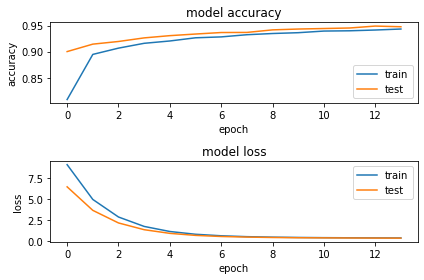

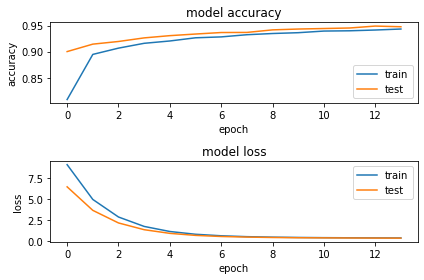

In [ ]:
# training the model and saving metrics in history
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_acc', mode='max', verbose=1)

history = model.fit(X_train, Y_train,
          batch_size=32, epochs=250,
          verbose=2,
          validation_data=(X_val, Y_val), callbacks=[es])

fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

In [ ]:
reg = [0.0001, 0.001, 0.01, 0.1]
import keras
def build_model_early():
  # building a linear stack of layers with the sequential model
  model = Sequential()
  model.add(Dense(500, input_shape=(784,)))
  model.add(Activation('relu'))                            
  model.add(Dense(500))
  model.add(Activation('relu'))
  model.add(Dense(10))
  model.add(Activation('softmax'))
  return model

In [ ]:
acc = []
loss = []
for param in reg:
    model = build_model_early()
    es = EarlyStopping(monitor='val_acc', mode='max', patience=param ,verbose=1)

    model.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer='adam')

    history = model.fit(X_train, Y_train,
          batch_size=128, epochs=250,
          verbose=2,
          validation_data=(X_val, Y_val), callbacks=[es])
    acc.append(model.evaluate(X_test, Y_test)[1])
    loss.append(model.evaluate(X_test, Y_test)[0])

Epoch 1/250
391/391 - 1s - loss: 0.2413 - acc: 0.9286 - val_loss: 0.1131 - val_acc: 0.9656
Epoch 2/250
391/391 - 1s - loss: 0.0871 - acc: 0.9729 - val_loss: 0.0812 - val_acc: 0.9741
Epoch 3/250
391/391 - 1s - loss: 0.0569 - acc: 0.9816 - val_loss: 0.0893 - val_acc: 0.9724
Epoch 00003: early stopping
313/313 [==============================] - 1s 2ms/step - loss: 0.0915 - acc: 0.9715
Epoch 1/250
391/391 - 1s - loss: 0.2447 - acc: 0.9288 - val_loss: 0.1138 - val_acc: 0.9659
Epoch 2/250
391/391 - 1s - loss: 0.0880 - acc: 0.9739 - val_loss: 0.1065 - val_acc: 0.9666
Epoch 3/250
391/391 - 1s - loss: 0.0569 - acc: 0.9826 - val_loss: 0.0686 - val_acc: 0.9786
Epoch 4/250
391/391 - 1s - loss: 0.0387 - acc: 0.9880 - val_loss: 0.0784 - val_acc: 0.9777
Epoch 00004: early stopping
313/313 [==============================] - 1s 2ms/step - loss: 0.0739 - acc: 0.9771
Epoch 1/250
391/391 - 1s - loss: 0.2411 - acc: 0.9298 - val_loss: 0.1230 - val_acc: 0.9623
Epoch 2/250
391/391 - 1s - loss: 0.0873 - acc: 0

Text(0.5, 0, 'patience parameter')

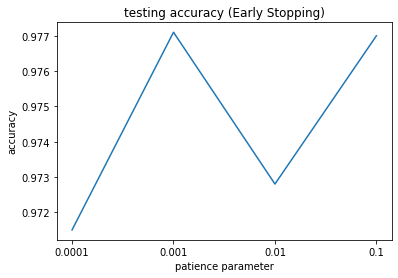

In [ ]:
plt.plot(['0.0001', '0.001', '0.01', '0.1'],acc)
plt.title('testing accuracy (Early Stopping)')
plt.ylabel('accuracy')
plt.xlabel('patience parameter')

Text(0.5, 0, 'patience parameter')

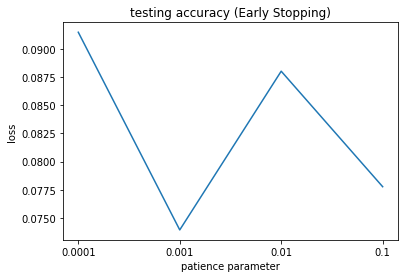

In [ ]:
plt.plot(['0.0001', '0.001', '0.01', '0.1'],loss)
plt.title('testing accuracy (Early Stopping)')
plt.ylabel('loss')
plt.xlabel('patience parameter')

#Part b : Implementing Dropout Layer


In [ ]:
from tensorflow.keras import regularizers
def build_model_drop(i):
  # building a linear stack of layers with the sequential model
  model = Sequential()
  model.add(Dense(500, input_shape=(784,)))
  model.add(Activation('relu'))                            
  model.add(Dropout(i))
  model.add(Dense(500))
  model.add(Activation('relu'))
  model.add(Dropout(i))
  model.add(Dense(10))
  model.add(Activation('softmax'))
  return model

In [ ]:
acc = []
loss = []
reg = [0, 0.1, 0.2, 0.3, 0.4]
for param in reg:
    model = build_model_drop(param)
    model.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer='adam')

    history = model.fit(X_train, Y_train,
          batch_size=128, epochs=250,
          verbose=2,
          validation_data=(X_val, Y_val))
    acc.append(model.evaluate(X_test, Y_test)[1])
    loss.append(model.evaluate(X_test, Y_test)[0])

Epoch 1/250
391/391 - 1s - loss: 0.2399 - acc: 0.9297 - val_loss: 0.1187 - val_acc: 0.9639
Epoch 2/250
391/391 - 1s - loss: 0.0880 - acc: 0.9731 - val_loss: 0.0886 - val_acc: 0.9734
Epoch 3/250
391/391 - 1s - loss: 0.0561 - acc: 0.9822 - val_loss: 0.0846 - val_acc: 0.9716
Epoch 4/250
391/391 - 1s - loss: 0.0358 - acc: 0.9886 - val_loss: 0.0687 - val_acc: 0.9795
Epoch 5/250
391/391 - 1s - loss: 0.0277 - acc: 0.9912 - val_loss: 0.0710 - val_acc: 0.9785
Epoch 6/250
391/391 - 1s - loss: 0.0191 - acc: 0.9938 - val_loss: 0.0810 - val_acc: 0.9790
Epoch 7/250
391/391 - 1s - loss: 0.0202 - acc: 0.9931 - val_loss: 0.0892 - val_acc: 0.9791
Epoch 8/250
391/391 - 1s - loss: 0.0174 - acc: 0.9941 - val_loss: 0.0764 - val_acc: 0.9816
Epoch 9/250
391/391 - 1s - loss: 0.0146 - acc: 0.9952 - val_loss: 0.0978 - val_acc: 0.9784
Epoch 10/250
391/391 - 1s - loss: 0.0136 - acc: 0.9953 - val_loss: 0.0874 - val_acc: 0.9788
Epoch 11/250
391/391 - 1s - loss: 0.0113 - acc: 0.9962 - val_loss: 0.0783 - val_acc: 0.98

Text(0.5, 0, 'patience parameter')

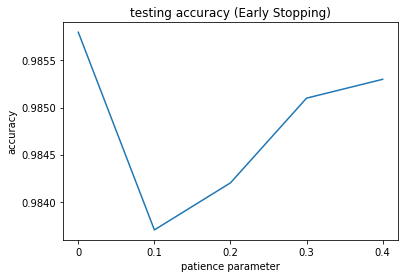

In [ ]:
plt.plot(['0', '0.1', '0.2', '0.3', '0.4'],acc)
plt.title('testing accuracy (Early Stopping)')
plt.ylabel('accuracy')
plt.xlabel('patience parameter')

Text(0.5, 0, 'patience parameter')

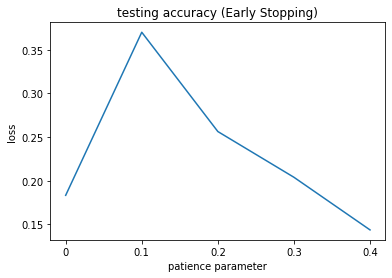

In [ ]:
plt.plot(['0', '0.1', '0.2', '0.3', '0.4'],loss)
plt.title('testing accuracy (Early Stopping)')
plt.ylabel('loss')
plt.xlabel('patience parameter')